# 4 Training and Modeling Data<a id='4_Training_and_Modeling_Data'></a>

## Imports <a id="Imports"></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn import pipeline
from sklearn import model_selection
from sklearn import linear_model
from sklearn import ensemble
from sklearn import neighbors
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline

#from sklearn.model_selection import StratifiedShuffleSplit,GridSearchCV
import matplotlib.pyplot as plt

# remove warning
#import warnings
#warnings.filterwarnings("ignore")


In [2]:
X_train = pd.read_csv("../data/4.X_train.csv")
y_train = pd.read_csv("../data/4.y_train.csv")
X_test = pd.read_csv("../data/4.X_test.csv")
y_test = pd.read_csv("../data/4.y_test.csv")

In [3]:
X_train.shape,y_train.shape

((7088, 16), (7088, 1))

In [4]:
X_test.shape,y_test.shape

((3039, 16), (3039, 1))

In [5]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,7088.0,-3.454018e-16,1.000071,-2.531322,-0.661337,-0.038008,0.709986,3.327966
Credit_Limit,7088.0,8.597793e+00,0.930669,7.271217,7.841395,8.418587,9.298671,10.449178
Total_Revolving_Bal,7088.0,9.103482e-01,0.638103,0.000000,0.248822,1.000000,1.396112,1.977219
Total_Trans_Amt,7088.0,8.167921e+00,0.656979,6.390241,7.674617,8.267449,8.468633,9.824661
Avg_Utilization_Ratio,7088.0,2.753070e-01,0.276635,0.000000,0.023000,0.175000,0.502000,0.999000
Gender_Encoded,7088.0,5.328725e-01,0.498953,0.000000,0.000000,1.000000,1.000000,1.000000
Dependent_count,7088.0,2.344949e+00,1.299597,0.000000,1.000000,2.000000,3.000000,5.000000
Education_Level_sorted,7088.0,2.839306e+00,1.215114,1.000000,2.000000,3.000000,3.000000,6.000000
Income_Category_sorted,7088.0,2.175226e+00,1.334986,1.000000,1.000000,2.000000,3.000000,5.000000
Card_Category_sorted,7088.0,1.081546e+00,0.330233,1.000000,1.000000,1.000000,1.000000,4.000000


In [6]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,3039.0,1.760867e-16,1.000165,-2.545475,-0.671517,-0.046864,0.702719,2.701607
Credit_Limit,3039.0,8.616519e+00,0.940983,7.271217,7.854381,8.432724,9.328701,10.449178
Total_Revolving_Bal,3039.0,9.134881e-01,0.640117,0.000000,0.349961,1.000000,1.401403,1.961808
Total_Trans_Amt,3039.0,8.157574e+00,0.648578,6.234411,7.682021,8.271293,8.453401,9.797849
Avg_Utilization_Ratio,3039.0,2.739293e-01,0.273522,0.000000,0.022500,0.177000,0.503500,0.994000
Gender_Encoded,3039.0,5.202369e-01,0.499673,0.000000,0.000000,1.000000,1.000000,1.000000
Dependent_count,3039.0,2.349128e+00,1.297511,0.000000,1.000000,2.000000,3.000000,5.000000
Education_Level_sorted,3039.0,2.851925e+00,1.201185,1.000000,2.000000,3.000000,3.000000,6.000000
Income_Category_sorted,3039.0,2.199079e+00,1.332057,1.000000,1.000000,2.000000,3.000000,5.000000
Card_Category_sorted,3039.0,1.088516e+00,0.341929,1.000000,1.000000,1.000000,1.000000,4.000000


## Training and Modeling <a id=Training_and_Modeling ></a>

In [7]:
threshhold_and_plot_score = pd.DataFrame(index=[],columns =[])

In [8]:
def threshhold_and_plot(y_test,target,n_points=50,plot=True):
    probs = np.linspace(0,1,n_points)
    def make_thresh(): 
        precision = [metrics.precision_score(y_test,np.where(target > thresh,1,0),zero_division=1) for thresh in probs]
        recall = [metrics.recall_score(y_test,np.where(target > thresh,1,0),labels=np.unique(target),zero_division=1) for thresh in probs]
        f1 = [metrics.f1_score(y_test,np.where(target > thresh,1,0),labels=np.unique(target),zero_division=1) for thresh in probs]
        return precision,recall,f1

    precision,recall,f1 = make_thresh()
    if plot:
        plt.plot(probs,precision,label='precision')
        plt.plot(probs,recall,label='recall')
        plt.plot(probs,f1,label='f1')
        plt.title("Metrics at different threshold")
        plt.xlabel("Probability")
        plt.legend()
        return precision,recall,f1
    else:
        return precision,recall,f1
    
def max_thresh(score_vec):
    max_idx=np.argmax(score_vec)
    max_score=score_vec[max_idx]
    return max_idx,max_score

In [9]:
#plot roc
def plot_roc(actuals,preds):
    fpr, tpr, thresholds = metrics.roc_curve(actuals, preds)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    display.plot()
    plt.show()
    return fpr, tpr, thresholds

In [10]:
def make_confusion_matrix_ROC(y_actual,y_predict,title,score=False,y_class_report=False,ROC_AUC=False):
    
    #confusion_matrix
    fig, ax = plt.subplots(1, 1)
    Con_Mtx = metrics.confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=Con_Mtx,display_labels=["No","Yes"])
    disp.plot(cmap='Blues',ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()
    
    #Scores
    if score:
        #print("accuracy_score : {0}\n".format(metrics.accuracy_score(y_actual,y_predict)))
        Con_Mtx = metrics.confusion_matrix(y_actual,y_predict, labels=[0,1]).ravel()
        print("True -ve : {0}\nFalse +ve : {1}\nFalse -ve : {2}\nTrue +ve : {3}\n".format(Con_Mtx[0],Con_Mtx[1],Con_Mtx[2],Con_Mtx[3]))

    
    #classification_report
    if y_class_report:
        y_class_report = metrics.classification_report(y_actual, y_predict, target_names=["not 1", "1"])
        print("classification report\n", y_class_report )
    
    #ROC_AUC Curve
    if ROC_AUC:
        print("ROC_AUC Curve")
        plot_roc(y_actual,y_predict)
    

### Model Selection 

Four competing supervised classfication models/algorithms are considered, namely, 
* Logistic Regression classification
* Random Forest classifier
* KNeighbours classification
* XGBoost classifier 

### Evaluation Metrics

Thinking of customer will not exit but he does, this means income loss for the Bank. Bank need to take the action steps for this scenario. This is false negative, and is "recall". Banks is looking for recall to be maximized, greater the recall lesser the chances of false negative means lesser chances of predicting customers will not exit where in reality they do. Since classes in the data are unbalanced, I can make use of confusion matrix to examine the outcome of model. Recall and precision metrics can be calculated from the confusion matrix, and this would help me assessing the models.

This project is aim to predict potential churn customers, and it is realised that the client cost of mistakenly classifying non-churn customer as churn may be high in practice because banks would not want to lose valuable customers, and the banks would like to identify churners at their best efforts as well. Thus, it would be useful to consider Recall. To complement this Receiver Operating Characteristic curve (ROC) is used. ROC is a plot of True Positive Rate (TPR) against False Positive Rate (FPR). This means I can consider TPR and FPR simultanesouly, by making use of the area under the curve (AUC) of ROC.

### Training and Modeling

In [11]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy().ravel()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy().ravel()

In [12]:
# models listing and fitting
models = [
        linear_model.LogisticRegression(),
        ensemble.RandomForestClassifier(),
        neighbors.KNeighborsClassifier(),
        XGBClassifier(use_label_encoder=False)
        ]

for model in models :
            model.fit(X_train,y_train)

[19:45:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [13]:
#Model predition
model_names = [
        'Logistic' ,
        'RandomForest',
        'KNeighbors',
        'XGBClassifier'
]
  
for classifier,classifier_name in zip(models,model_names):
    y_pred_test=classifier.predict(X_test)
    threshhold_and_plot_score.loc[classifier_name,'precision'] = metrics.precision_score(y_pred=y_pred_test, y_true= y_test)
    threshhold_and_plot_score.loc[classifier_name,'recall'] = metrics.recall_score(y_pred=y_pred_test, y_true= y_test)
    threshhold_and_plot_score.loc[classifier_name,'f1'] = metrics.f1_score(y_pred=y_pred_test, y_true= y_test)
    threshhold_and_plot_score.loc[classifier_name,'accuracy'] = metrics.accuracy_score(y_pred=y_pred_test, y_true= y_test)
  

As I can see XBG shows falls -ves less when compared to other models.Let me check recall scores.

In [14]:
# Precison and recall comparions
threshhold_and_plot_score

,precision,recall,f1,accuracy
Logistic,0.733624,0.344262,0.468619,0.874630
RandomForest,0.889474,0.692623,0.778802,0.936821
KNeighbors,0.714953,0.313525,0.435897,0.869694
XGBClassifier,0.861432,0.764344,0.809989,0.942415


Best Model is from XG Classifier with Score 76%

<AxesSubplot:>

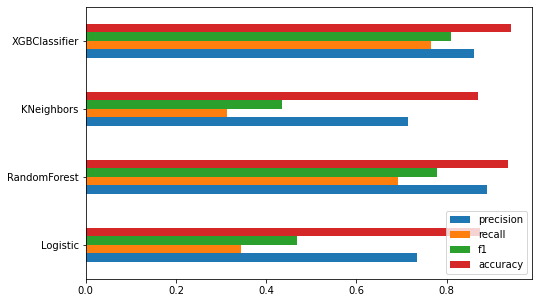

In [15]:
fig,ax=plt.subplots(figsize=(8,5))
threshhold_and_plot_score.plot(kind='barh',ax=ax)

Since I am looking for best recall score, XGB tops the list, followed with Random Forest. Now let me try adjusting the threshold for these models.

In [16]:
#precision, recall threshold from precision recall curve for RF and XGB classifires
for classifier,classifier_name in zip(models,model_names):
    proba_pred=classifier.predict_proba(X_test)[:,1]
    if classifier_name == 'RandomForest':
        precision_RF,recall_RF,Threshold_RF = metrics.precision_recall_curve(y_true = y_test,probas_pred=proba_pred)
        #precision_RF,recall_RF,Threshold_RF  = threshhold_and_plot(y_test=y_test, target=proba_pred,n_points=50, plot=False)
    if classifier_name == 'XGBClassifier':
        precision_XGB,recall_XGB,Threshold_XGB = metrics.precision_recall_curve(y_true = y_test,probas_pred=proba_pred)
        #precision_XGB,recall_XGB,Threshold_XGB  = threshhold_and_plot(y_test=y_test, target=proba_pred,n_points=50, plot=False)
    

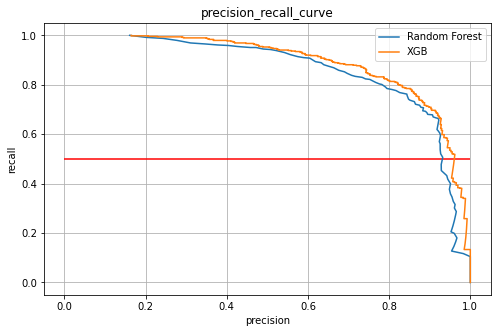

In [17]:
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(precision_RF,recall_RF,label = 'Random Forest')
ax.plot(precision_XGB,recall_XGB,label = 'XGB')
ax.set_xlabel('precision')
ax.set_ylabel('recall')
ax.set_title('precision_recall_curve')
ax.hlines(y=0.5,xmin=0,xmax=1,color='red')
ax.legend()
ax.grid()

Random Forest and XGB look alike, with XGB slightly performaing better at recall 0.5. So let me get the threshold for XGB.

#### XGBoost Classification

XGBoost uses gradient boosting technique, and is on the priciples of decison tree ensemble, which a set of classification and regression trees. It is similar to Random Forest difference is how the algorithms train the models.

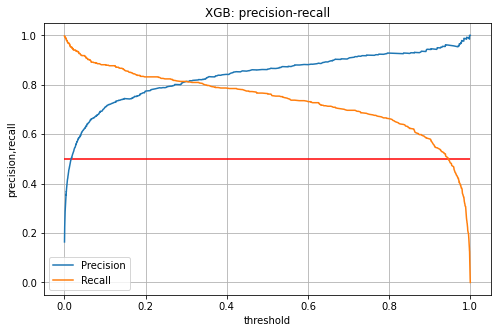

In [18]:
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(Threshold_XGB,precision_XGB[1:],label = 'Precision')
ax.plot(Threshold_XGB,recall_XGB[1:],label = 'Recall')
ax.set_xlabel('threshold')
ax.set_ylabel('precision,recall')
ax.set_title('XGB: precision-recall')
ax.hlines(y=0.5,xmin=0,xmax=1,color='red')
ax.legend()
ax.grid()

At threshold 0.2, I can see recall is little over 80% and precision is little below 80%

#### XGB with threshold 0.2

[19:45:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


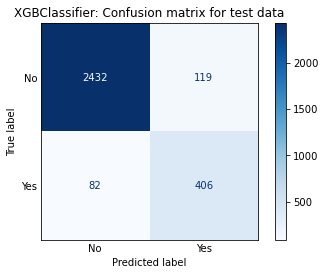

True -ve : 2432
False +ve : 119
False -ve : 82
True +ve : 406



In [19]:
xgb_mod = XGBClassifier(use_label_encoder=False)
xgb_mod.fit(X_train,y_train)
y_pred_proba=xgb_mod.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_proba >=0.2).astype('int')
title = classifier_name + ": Confusion matrix for test data" 
make_confusion_matrix_ROC(y_test,y_pred_test,title,score=True,y_class_report=False,ROC_AUC=False)

After applying threshold False -ve are further reduced.Check the precison and recall score

In [20]:
#Precision and recall scores
precision_XGB = metrics.precision_score(y_true = y_test,y_pred=y_pred_test)
recall_XGB = metrics.recall_score(y_true = y_test,y_pred=y_pred_test)
print('precision: ',precision_XGB)
print('recall: ',recall_XGB)

precision:  0.7733333333333333
recall:  0.8319672131147541


In [21]:
classifier_name = 'XGB after with threshold 0.2'
threshhold_and_plot_score.loc[classifier_name,'precision'] = metrics.precision_score(y_pred=y_pred_test, y_true= y_test)
threshhold_and_plot_score.loc[classifier_name,'recall'] = metrics.recall_score(y_pred=y_pred_test, y_true= y_test)
threshhold_and_plot_score.loc[classifier_name,'f1'] = metrics.f1_score(y_pred=y_pred_test, y_true= y_test)
threshhold_and_plot_score.loc[classifier_name,'accuracy'] = metrics.accuracy_score(y_pred=y_pred_test, y_true= y_test)

In [22]:
threshhold_and_plot_score

,precision,recall,f1,accuracy
Logistic,0.733624,0.344262,0.468619,0.874630
RandomForest,0.889474,0.692623,0.778802,0.936821
KNeighbors,0.714953,0.313525,0.435897,0.869694
XGBClassifier,0.861432,0.764344,0.809989,0.942415
XGB after with threshold 0.2,0.773333,0.831967,0.801579,0.933860


XGB boost with threshold tops all interms of recall and accuracy